#ESTE TRABAJO SE HIZO CON UNA BASE DE DATOS QUE CONTIENE NUEVE ATRIBUTOS APARTE DEL ATRIBUTO INDEX

In [66]:
# Cargando las librerias necesarias
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [67]:
# Cargando el dataframe
df = pd.read_csv("books.csv", index_col=0)

In [68]:
# Primeras 3 filas del conjunto de datos
df.head(3)

title  \
bookID                                                      
1       Harry Potter and the Half-Blood Prince (Harry ...   
2       Harry Potter and the Order of the Phoenix (Har...   
3       Harry Potter and the Sorcerer's Stone (Harry P...   

                           authors  average_rating        isbn        isbn13  \
bookID                                                                         
1       J.K. Rowling-Mary GrandPré            4.56  0439785960  9.780440e+12   
2       J.K. Rowling-Mary GrandPré            4.49  0439358078  9.780439e+12   
3       J.K. Rowling-Mary GrandPré            4.47  0439554934  9.780440e+12   

       language_code  # num_pages  ratings_count text_reviews_count;;;  
bookID                                                                  
1                eng        652.0      1944099.0              26249;;;  
2                eng        870.0      1996446.0              27613;;;  
3                eng        320.0      5629932.0              70390;;;

In [69]:
# Imprimiendo información básica sobre el conjunto de datos usando las funciones print() y .format()

print("Existen {} libros y {} caracteristicas en este conjunto de datos. \n".format(df.shape[0],df.shape[1]))


Existen 13711 libros y 9 caracteristicas en este conjunto de datos. 



In [71]:
# Imprimiendo información de paises, descripción y puntos
df[["authors", "title","ratings_count"]].head(15)

authors  \
bookID                                
1        J.K. Rowling-Mary GrandPré   
2        J.K. Rowling-Mary GrandPré   
3        J.K. Rowling-Mary GrandPré   
4                      J.K. Rowling   
5        J.K. Rowling-Mary GrandPré   
8        J.K. Rowling-Mary GrandPré   
10                     J.K. Rowling   
12                    Douglas Adams   
13                    Douglas Adams   
14                    Douglas Adams   
16        Douglas Adams-Stephen Fry   
18                    Douglas Adams   
21      Bill Bryson-William Roberts   
22                      Bill Bryson   
23                      Bill Bryson   

                                                    title  ratings_count  
bookID                                                                    
1       Harry Potter and the Half-Blood Prince (Harry ...      1944099.0  
2       Harry Potter and the Order of the Phoenix (Har...      1996446.0  
3       Harry Potter and the Sorcerer's Stone (Harry P...      5629932.0  
4       Harry Potter and the Chamber of Secrets (Harry...         6267.0  
5       Harry Potter and the Prisoner of Azkaban (Harr...      2149872.0  
8       Harry Potter Boxed Set  Books 1-5 (Harry Potte...        38872.0  
10           Harry Potter Collection (Harry Potter  #1-6)        27410.0  
12      The Ultimate Hitchhiker's Guide: Five Complete...         3602.0  
13          The Ultimate Hitchhiker's Guide to the Galaxy       240189.0  
14      The Hitchhiker's Guide to the Galaxy (Hitchhik...         4416.0  
16      The Hitchhiker's Guide to the Galaxy (Hitchhik...         1222.0  
18      The Ultimate Hitchhiker's Guide (Hitchhiker's ...         2801.0  
21                   A Short History of Nearly Everything       228522.0  
22                            Bill Bryson's African Diary         6993.0  
23      Bryson's Dictionary of Troublesome Words: A Wr...         2020.0

In [72]:
# Agrupación por país
##country = df.groupby("country")

# Resumen estadístico de todos los países.
##country.describe().head()


#Agrupación por autor
authors = df.groupby("authors")
authors.describe().head()

# num_pages         \
                                                         count   mean   
authors                                                                 
A.B. Yehoshua-Hillel Halkin                                2.0  416.0   
A.D.P. Briggs-Leo Tolstoy-Fyodor Dostoyevsky               1.0  256.0   
A.E. Cunningham-Harlan Ellison-Charles F. Mille...         1.0  232.0   
A.J. Jacobs                                                1.0  389.0   
A.M. Homes                                                 2.0  238.5   

                                                                               \
                                                           std    min     25%   
authors                                                                         
A.B. Yehoshua-Hillel Halkin                         226.274170  256.0  336.00   
A.D.P. Briggs-Leo Tolstoy-Fyodor Dostoyevsky               NaN  256.0  256.00   
A.E. Cunningham-Harlan Ellison-Charles F. Mille...         NaN  232.0  232.00   
A.J. Jacobs                                                NaN  389.0  389.00   
A.M. Homes                                           24.748737  221.0  229.75   

                                                                          \
                                                      50%     75%    max   
authors                                                                    
A.B. Yehoshua-Hillel Halkin                         416.0  496.00  576.0   
A.D.P. Briggs-Leo Tolstoy-Fyodor Dostoyevsky        256.0  256.00  256.0   
A.E. Cunningham-Harlan Ellison-Charles F. Mille...  232.0  232.00  232.0   
A.J. Jacobs                                         389.0  389.00  389.0   
A.M. Homes                                          238.5  247.25  256.0   

                                                   average_rating         \
                                                            count   mean   
authors                                                                    
A.B. Yehoshua-Hillel Halkin                                   2.0  3.585   
A.D.P. Briggs-Leo Tolstoy-Fyodor Dostoyevsky                  1.0  3.760   
A.E. Cunningham-Harlan Ellison-Charles F. Mille...            1.0  4.150   
A.J. Jacobs                                                   1.0  3.770   
A.M. Homes                                                    2.0  3.455   

                                                     ...           isbn13  \
                                                     ...              75%   
authors                                              ...                    
A.B. Yehoshua-Hillel Halkin                          ...     9.780155e+12   
A.D.P. Briggs-Leo Tolstoy-Fyodor Dostoyevsky         ...     9.780461e+12   
A.E. Cunningham-Harlan Ellison-Charles F. Mille...   ...     9.780712e+12   
A.J. Jacobs                                          ...     9.780743e+12   
A.M. Homes                                           ...     9.781564e+12   

                                                                  \
                                                             max   
authors                                                            
A.B. Yehoshua-Hillel Halkin                         9.780156e+12   
A.D.P. Briggs-Leo Tolstoy-Fyodor Dostoyevsky        9.780461e+12   
A.E. Cunningham-Harlan Ellison-Charles F. Mille...  9.780712e+12   
A.J. Jacobs                                         9.780743e+12   
A.M. Homes                                          9.781862e+12   

                                                   ratings_count           \
                                                           count     mean   
authors                                                                     
A.B. Yehoshua-Hillel Halkin                                  2.0    634.5   
A.D.P. Briggs-Leo Tolstoy-Fyodor Dostoyevsky                 1.0     17.0   
A.E. Cunningham-Harlan Ellison-Charles F. Mille...  

In [74]:
# Seleccionamos los 6 puntos promedio más altos entre los 44 países
authors.mean().sort_values(by="ratings_count",ascending=False).head(6)

average_rating  \
authors                                                              
Stephenie Meyer                                               3.59   
J.K. Rowling-Mary GrandPré                                    4.55   
Paulo Coelho-Alan R. Clarke-Özdemir İnce                      3.85   
Charlotte Brontë-Michael Mason-João Gaspar Rod...            4.11   
Sara Gruen                                                    4.08   
Aldous Huxley-Felisberto Albuquerque                          3.98   

                                                          isbn13  # num_pages  \
authors                                                                         
Stephenie Meyer                                     9.780316e+12        521.0   
J.K. Rowling-Mary GrandPré                          9.780483e+12        944.0   
Paulo Coelho-Alan R. Clarke-Özdemir İnce            9.780061e+12        197.0   
Charlotte Brontë-Michael Mason-João Gaspar Rod...  9.780142e+12        532.0   
Sara Gruen                                          9.781565e+12        335.0   
Aldous Huxley-Felisberto Albuquerque                9.780061e+12        288.0   

                                                    ratings_count  
authors                                                            
Stephenie Meyer                                       2184866.500  
J.K. Rowling-Mary GrandPré                            1734431.125  
Paulo Coelho-Alan R. Clarke-Özdemir İnce              1592632.000  
Charlotte Brontë-Michael Mason-João Gaspar Rod...    1328143.000  
Sara Gruen                                            1198632.000  
Aldous Huxley-Felisberto Albuquerque                  1173739.000

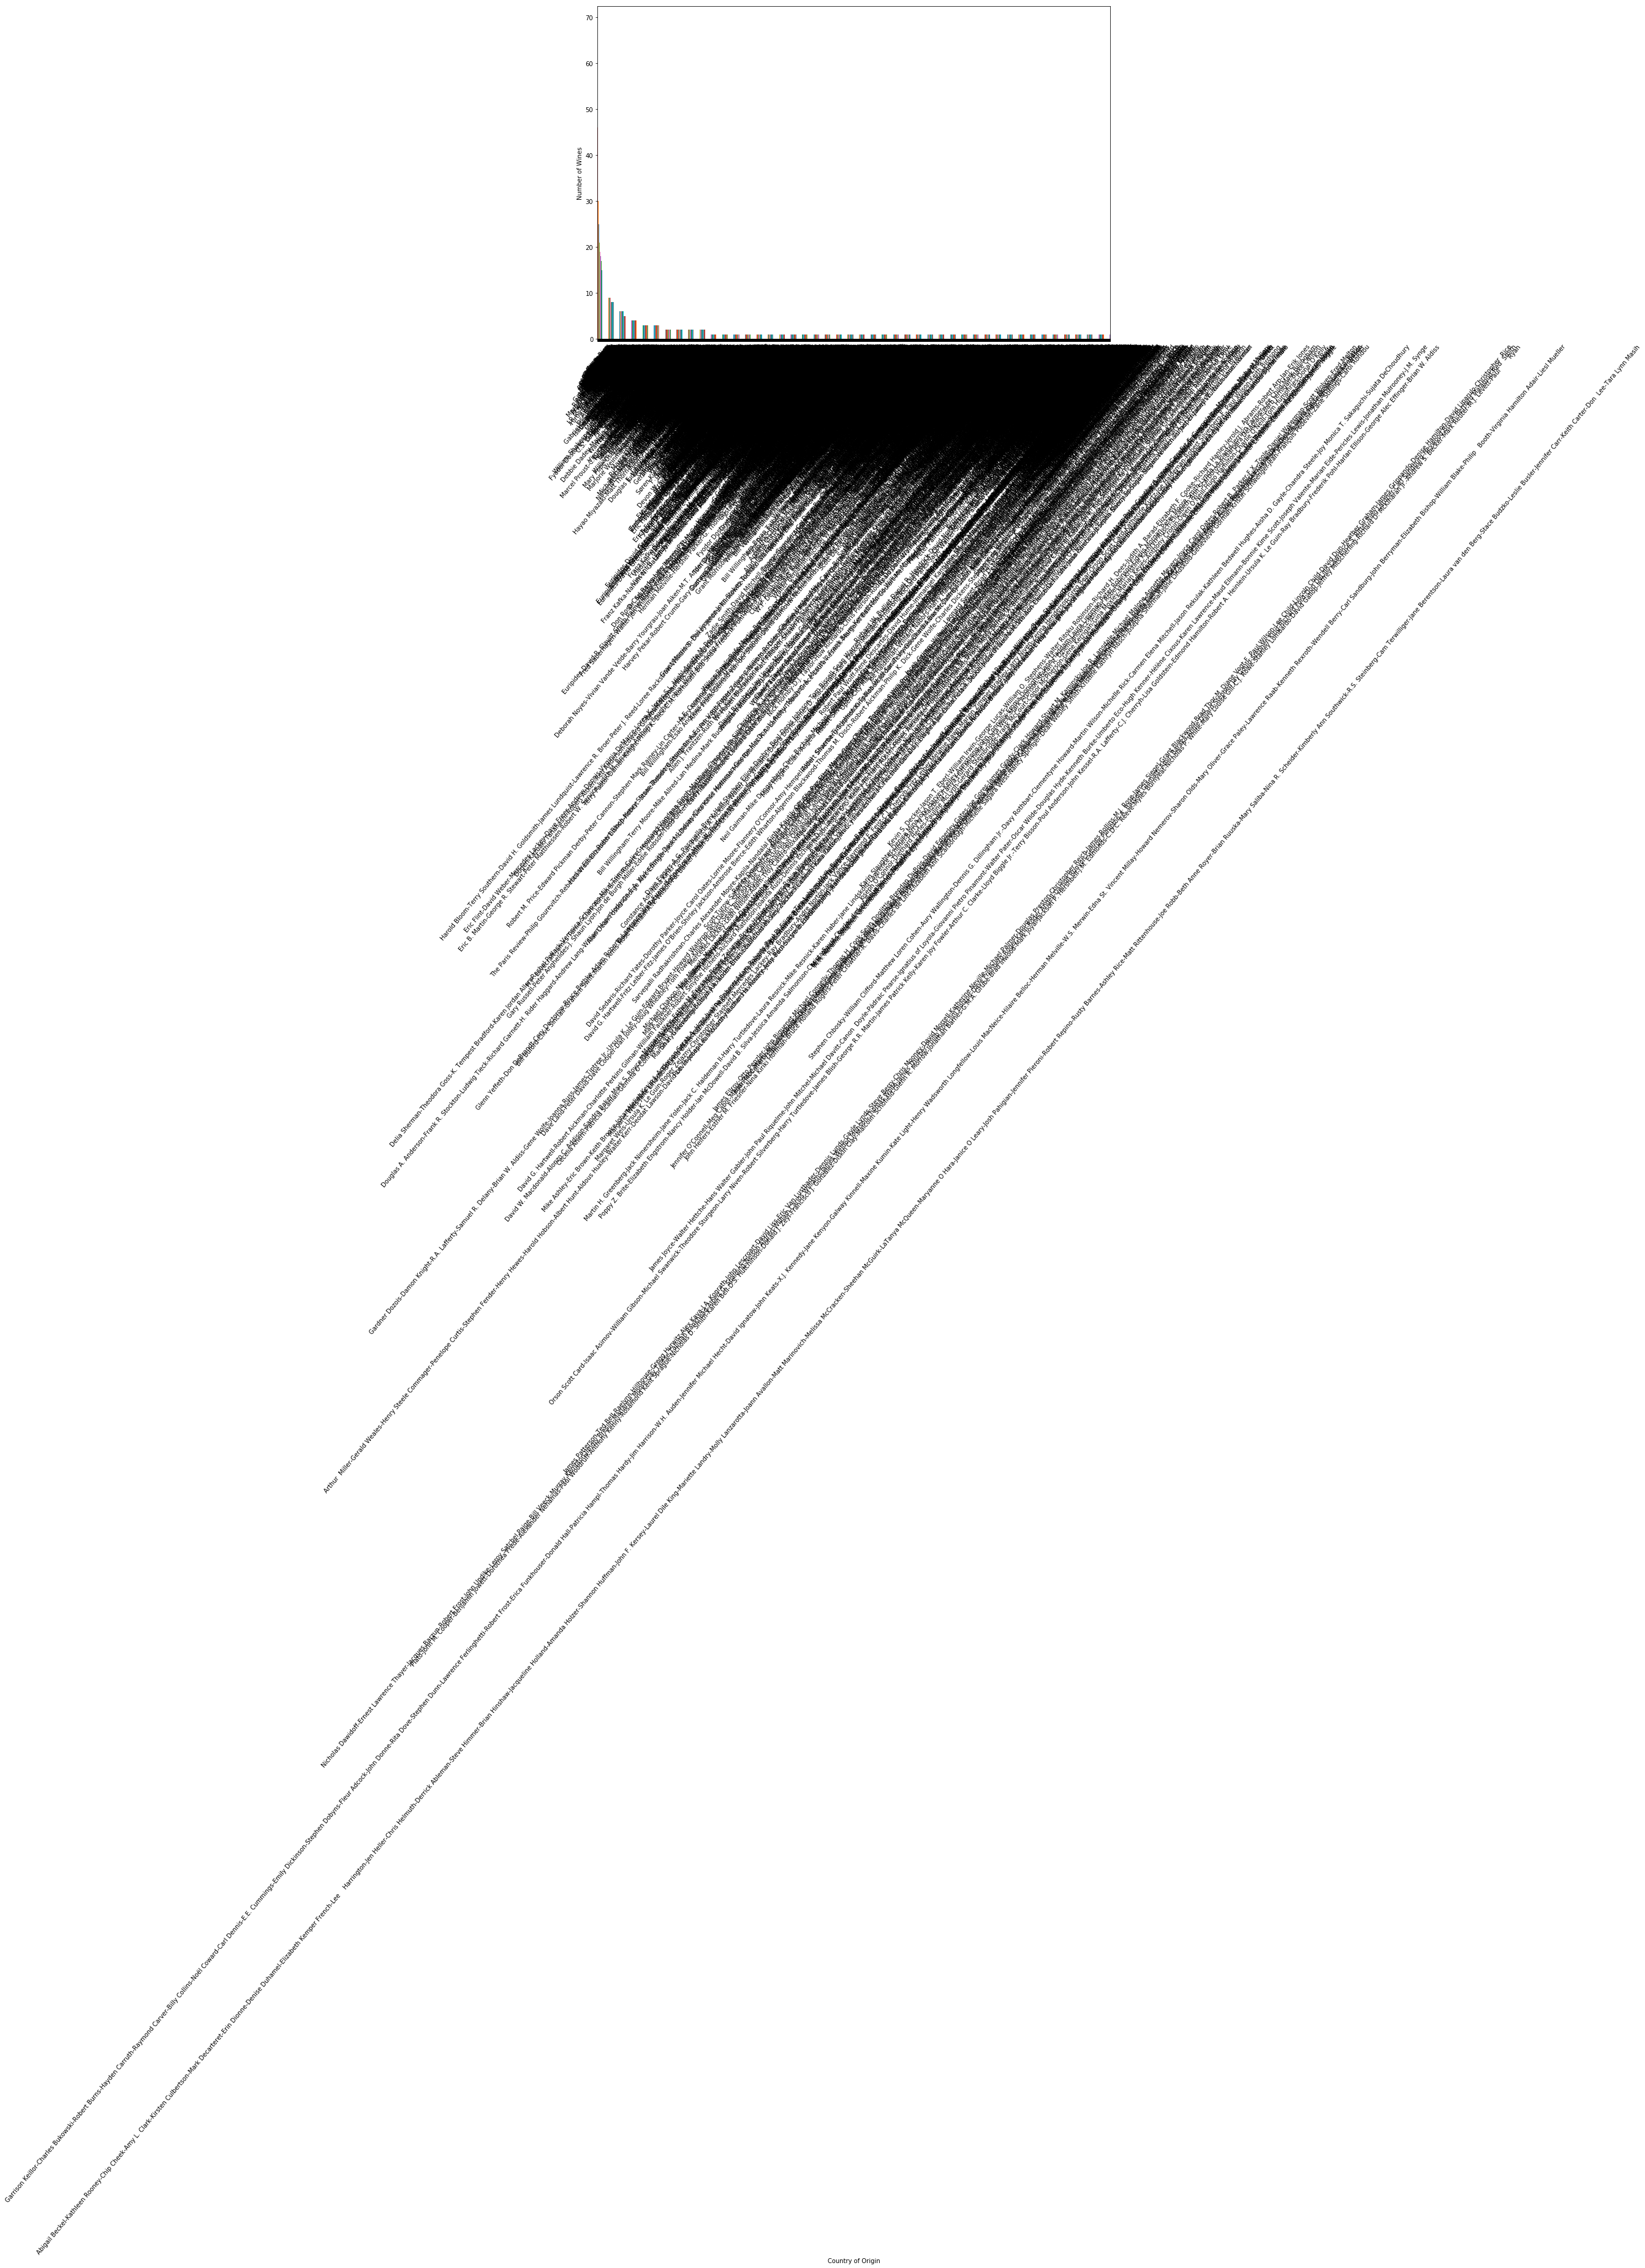

In [75]:
# Graficando el histograma de frecuencua de los paises y la cantidad de vinos
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
authors.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

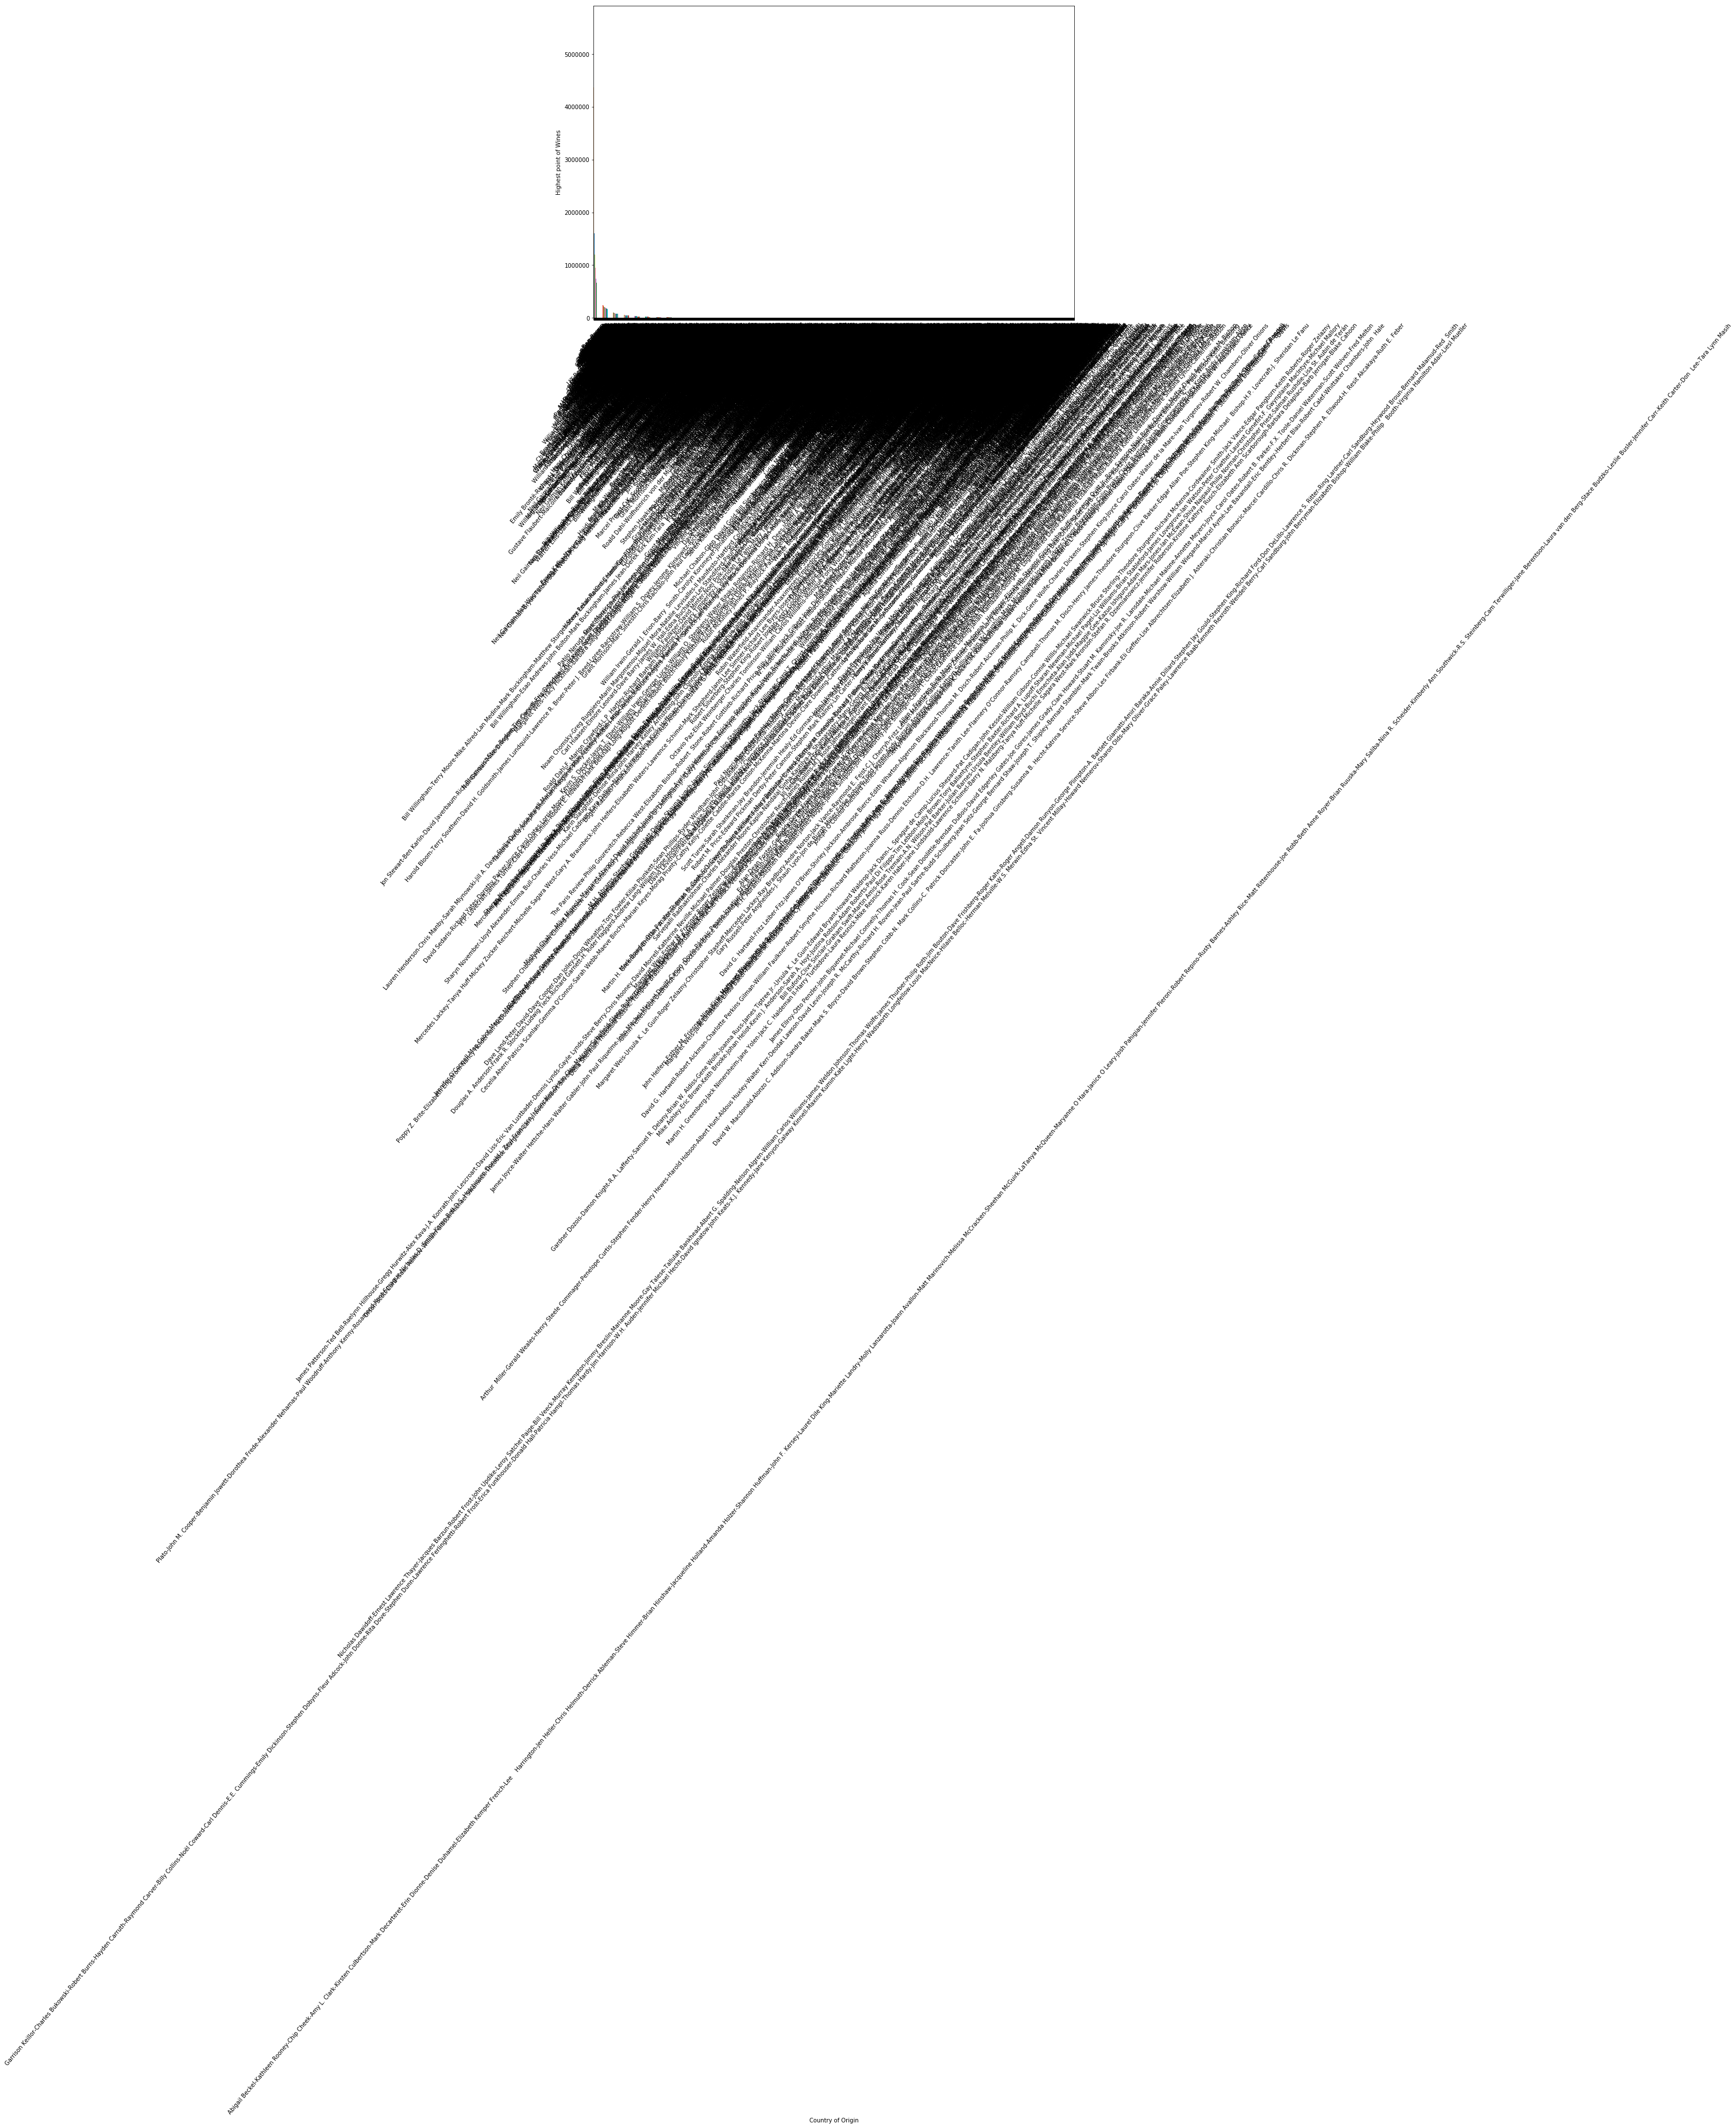

In [149]:
# Graficando el histograma de frecuencua de los paises y los puntos de los vinos
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
authors.max().sort_values(by="ratings_count",ascending=False)["ratings_count"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

In [152]:
# Comencemos con una descrpción
#text = df.description[0]
text = df.title[1000] + df.title[0]
text


'Chicago Blues: The City and the MusicHarry Potter and the Half-Blood Prince (Harry Potter  #6)'

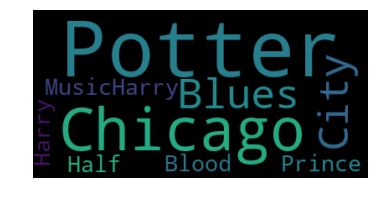

In [153]:
# Creando y generando una imagen de nube de palabras.
tipodeletra = "Quentin.otf"

wordcloud = WordCloud().generate(text)

# Mostrando la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

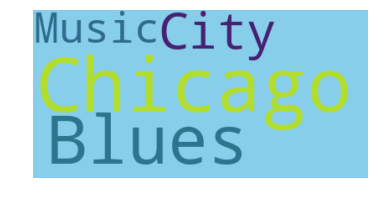

In [83]:
# Bajando el max_font_size, cambiando el número máximo de palabras y colocando un fodo de color
wordcloud = WordCloud(max_font_size=90, max_words=150, background_color="skyblue").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

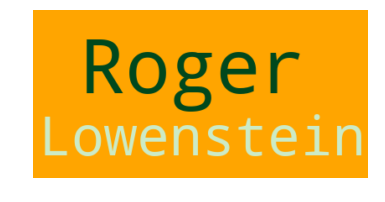

In [91]:
text = df.authors[3444]
wordcloud = WordCloud(max_font_size=90, max_words=150, background_color="Orange",colormap="Greens").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [30]:
# Guardando la imagen
wordcloud.to_file("WordCloud1.png")

In [95]:
# Combinaciones de palabras de la columna de autores
text = " ".join(str(review) for review in df.authors)
print ("Hay {} palabras en la combinación de todas los nombres de los autores.".format(len(text)))

Hay 345003 palabras en la combinación de todas las revisiones.


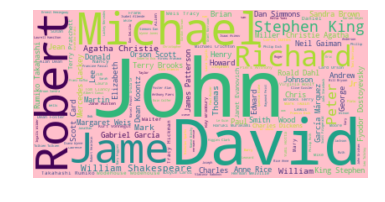

In [96]:
# Creando la lista stopwords a quitar:
stopwords = set(STOPWORDS)
stopwords.update(["Douglas", "Adams", "Rowling"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="pink").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Ahora trabajaremos la imagen de mascara, para ello trabajemos la siguiente imagen


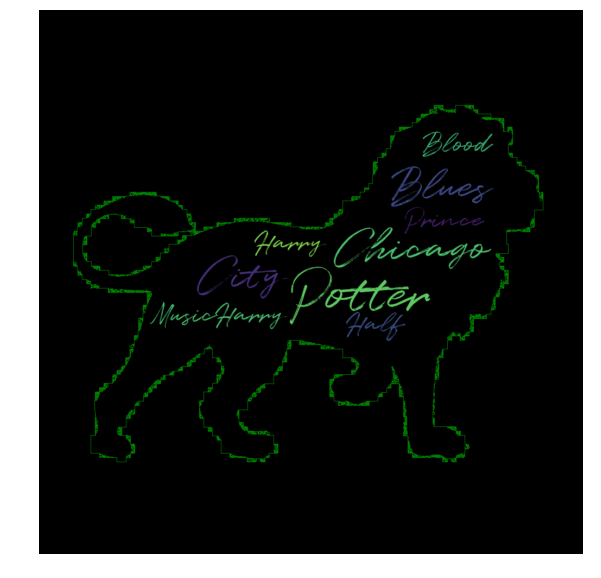

In [189]:
#Cambiando el tipo de letra
tipodeletra = "Quentin.otf"
wave_mask = np.array(Image.open( "lion.jpg"))
 
# Make the figure
wordcloud = WordCloud(font_path=tipodeletra,mask=wave_mask, contour_width=1,contour_color="green").generate(text)
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


In [138]:
# Creamos un array de una imagen de mascara
wine_mask = np.array(Image.open("lion.jpg"))
wine_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [177]:
# Función para transformar los valores a: 0 ó 255

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0
wine_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [180]:
# Transforma la máscara en una nueva función
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]),np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = transform_format(wine_mask[i].any())


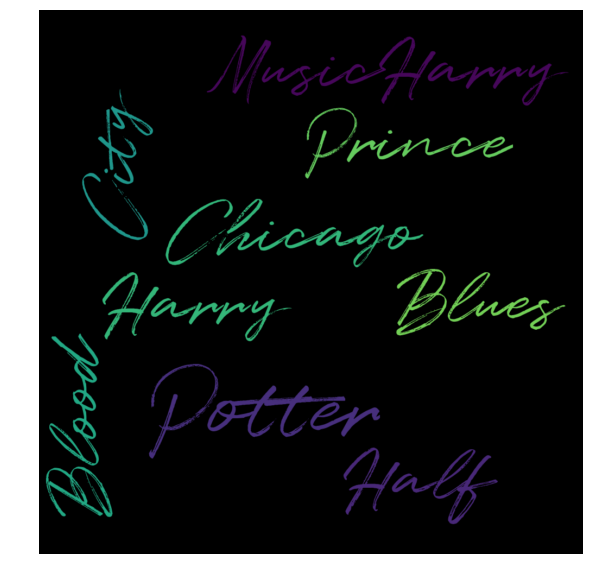

In [190]:
# Creando una imagen de nube de palabras
wc = WordCloud(font_path=tipodeletra,background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [183]:
def transform_format(val):
    if val == 0:
        return 0
    else:
        return 255

In [184]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [185]:
transformed_wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

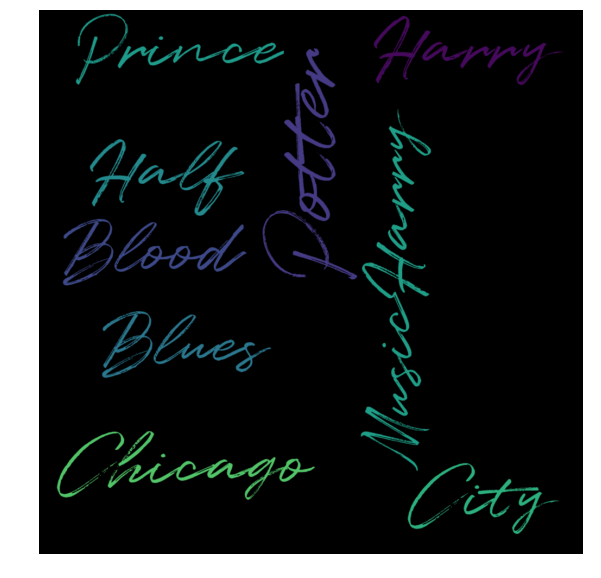

In [191]:
# Creando una imagen de nube de palabras
wc = WordCloud(font_path=tipodeletra,background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("img.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()